# Installation

⚡ _Note_: AI2-THOR often runs significantly _slower_ using Colab's runtime than it does with a local runtime. However, in many cases, it is nice to explore without installing anything locally and not all devices are compatible with running AI2-THOR (e.g., Windows devices, tablets, phones).

In [17]:
!pip install --upgrade ai2thor ai2thor-colab &> /dev/null
import ai2thor
import ai2thor_colab

from ai2thor.controller import Controller
from ai2thor_colab import (
    plot_frames,
    show_objects_table,
    side_by_side,
    overlay,
    show_video
)

ai2thor_colab.start_xserver()

"AI2-THOR Version: " + ai2thor.__version__

'AI2-THOR Version: 5.0.0'

In [2]:
controller = Controller()

thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [ 100%  24.6 MiB/s]  of 769.MB


# Workspace

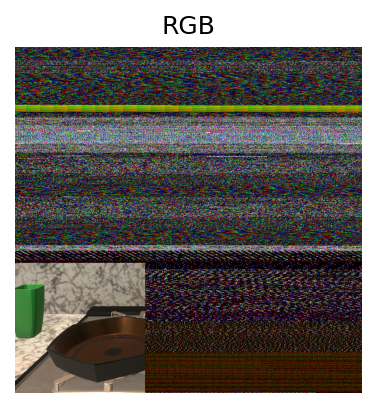

In [20]:
plot_frames(controller.last_event)

# Visualizations

## Plot Frames

Visualize each frame and image modality available on an Event.

In [26]:
renderDepthImage = True  #@param {type: "boolean"}
renderInstanceSegmentation = True  #@param {type: "boolean"}
renderSemanticSegmentation = True  #@param {type: "boolean"}
renderNormalsImage = True  #@param {type: "boolean"}

controller.reset(
    # makes the images a bit higher quality
    width=800,
    height=800,

    # Renders several new image modalities
    renderDepthImage=renderDepthImage,
    renderInstanceSegmentation=renderInstanceSegmentation,
    renderSemanticSegmentation=renderSemanticSegmentation,
    renderNormalsImage=renderNormalsImage
)

# adds a cameras from a third-person's point of view
scene_bounds = controller.last_event.metadata['sceneBounds']['center']
controller.step(
    action="AddThirdPartyCamera",
    position=dict(x=0, y=1.55, z=-2.3),
    rotation=dict(x=20, y=0, z=0)
)

# adds an orthographic top-down image
controller.step(
    action="AddThirdPartyCamera",
    position=dict(x=scene_bounds['x'], y=2.5, z=scene_bounds['z']),
    rotation=dict(x=90, y=0, z=0),
    orthographic=True,
    orthographicSize=3.25,
    skyboxColor="white"
)

plot_frames(controller.last_event)

ValueError: write to closed file

## Show Objects Table

Filter, sort, and view metadata for each object in an Event. Note that we have left off `objectOrientedBoundingBox`, `axisAlignedBoundingBox`, and `receptacleObjectIds` because they are too big for the table.

In [13]:
show_objects_table(controller.last_event.metadata['objects'])

Object Metadata. Not showing objectOrientedBoundingBox, axisAlignedBoundingBox, and receptacleObjectIds for clarity.


,objectType,objectId,name,position[x],position[y],position[z],rotation[x],rotation[y],rotation[z],distance,...,openness,pickupable,isPickedUp,moveable,mass,salientMaterials,assetId,parentReceptacles,controlledObjects,isMoving
0,Apple,Apple|-01.09|+00.96|-00.02,Apple_f33eaaa0,-1.0950,0.9633,-0.0199,3.4643,309.2330,269.8873,1.6480,...,0.0,True,False,False,0.20,[Food],Apple_10,[CounterTop|-01.24|+00.97|-00.64],None,False
1,Bottle,Bottle|-01.37|+00.89|+02.70,Bottle_8e7e267f,-1.3720,0.8862,2.6990,359.9912,0.0061,0.0050,4.1806,...,0.0,True,False,False,0.20,[Glass],Bottle_1,[Shelf|-01.64|+00.88|+02.72],None,False
2,Bowl,Bowl|+00.79|+00.90|-00.12,Bowl_148b0fbf,0.7941,0.9004,-0.1182,0.0000,0.0029,-0.0001,1.3826,...,0.0,True,False,False,0.47,[Plastic],Bowl_10,[CounterTop|+00.93|+00.95|-00.21],None,False
3,Bread,Bread|-00.78|+01.00|+00.21,Bread_5dd97b2d,-0.7790,0.9967,0.2100,0.0000,258.6418,0.0000,1.6576,...,0.0,True,False,False,0.70,[Food],Bread_10,[CounterTop|-01.24|+00.97|-00.64],None,False
4,ButterKnife,ButterKnife|-01.33|+00.92|-00.88,ButterKnife_42394ea7,-1.3258,0.9249,-0.8847,-0.0002,10.6788,269.9984,1.3754,...,0.0,True,False,False,0.08,[Metal],ButterKnife_1,[CounterTop|-01.24|+00.97|-00.64],None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Tomato,Tomato|-00.87|+00.96|-00.10,Tomato_9c51c4ef,-0.8701,0.9627,-0.0960,0.0057,0.0118,0.0961,1.4466,...,0.0,True,False,False,0.12,[Food],Tomato_10,[CounterTop|-01.24|+00.97|-00.64],None,False
63,Vase,Vase|-01.44|+00.18|+02.58,Vase_7932859a,-1.4350,0.1843,2.5830,359.9469,0.0105,359.9320,4.1551,...,0.0,True,False,False,1.00,[Ceramic],Vase_Decorative_1,"[Floor|+00.00|+00.00|+00.00, Shelf|-01.64|+00....",None,False
64,Vase,Vase|-01.73|+00.56|+02.66,Vase_b5cbe7f7,-1.7320,0.5561,2.6619,0.0083,0.0023,-0.0051,4.2921,...,0.0,True,False,False,1.00,[Ceramic],Vase_Medium_2,[Shelf|-01.64|+00.55|+02.72],None,False
65,Window,Window|-03.00|+01.00|-02.64,Window_e6cbc2b8,-2.9960,0.9980,-2.6400,90.0000,0.0001,0.0000,3.3042,...,0.0,False,False,False,0.00,None,,None,None,False


## Show Video

Builds a video from a sequence of image frames.

In [14]:
controller.reset(
    width=500,
    height=500,
    renderDepthImage=False,
    renderNormalsImage=False,
    renderInstanceSegmentation=False,
    renderSemanticSegmentation=False
)
frames = [
    controller.step(action="RotateLeft", degrees=5).frame
    for _ in range(360 // 5)
]
show_video(frames, fps=5)

ValueError: write to closed file

## Side By Side Frames

Shows 2 image frames side-by-side. This is often nice to visualize the before and after results from an action.

In [ ]:
side_by_side(
    frame1=controller.last_event.frame,
    frame2=controller.step("RotateRight", degrees=30).frame,
    title="RotateRight Result"
)

## Overlay Frames

In [ ]:
objectId = next(obj["objectId"] for obj in controller.last_event.metadata['objects'] if obj['pickupable'])
print("Picking up " + objectId)

start_frame = controller.last_event.frame
pickup_frame = controller.step(
    action="PickupObject",
    objectId=objectId,
    forceAction=True
).frame

#@markdown `frame2_alpha` controls the opacity that the 2nd frame has, when blended over the 1st frame.
#@markdown Notice with a 0.75 opacity, the status's base appears see-throguh.

overlay(
    frame1=start_frame,
    frame2=pickup_frame,
    title="Pickup Object",
    frame2_alpha=0.75 #@param {type: "slider", min: 0.01, max: 0.99, step: 0.01}
)